# Kuramoto model

In [1]:
import jax; jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import random
from jaxkuramoto import Kuramoto, theory, odeint
from jaxkuramoto.solver import runge_kutta
from jaxkuramoto.distribution import Normal, Uniform

import matplotlib.pyplot as plt

In [33]:
seed = 0

n_oscillator = 10**2
loc, scale = 0.0, 1.0
dist = Normal(loc, scale)
omegas = dist.sample(random.PRNGKey(seed), shape=(n_oscillator,))
K = 3.0

In [34]:
t0, t1 = 0.0, 15.0
dt = 0.01

model = Kuramoto(omegas, K=K)
init_thetas = random.uniform(random.PRNGKey(seed+1), shape=(n_oscillator,), maxval=2*jnp.pi)
sol = odeint(model.vector_fn, runge_kutta, t0, t1, dt, init_thetas, observable_fn=model.orderparameter)

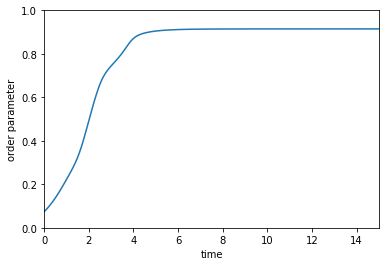

In [35]:
plt.xlabel("time")
plt.ylabel("order parameter")
plt.xlim(t0, t1)
plt.ylim(0, 1)
plt.plot(sol.ts, sol.observables)

In [36]:
orderparam_theory = theory.orderparam(K, dist)

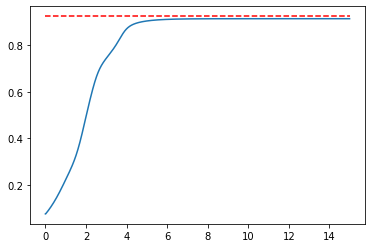

In [37]:
plt.plot(sol.ts, sol.observables)
plt.plot([t0, t1], [orderparam_theory, orderparam_theory], color='red', linestyle='--')

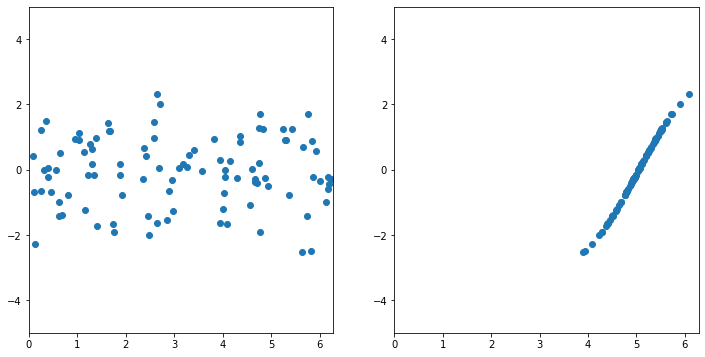

In [38]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.xlim(0, 2*jnp.pi)
plt.ylim(-5, 5)
plt.scatter(jnp.mod(sol.init_state, 2*jnp.pi), omegas)
plt.subplot(1,2,2)
plt.xlim(0, 2*jnp.pi)
plt.ylim(-5, 5)
plt.scatter(jnp.mod(sol.final_state, 2*jnp.pi), omegas)

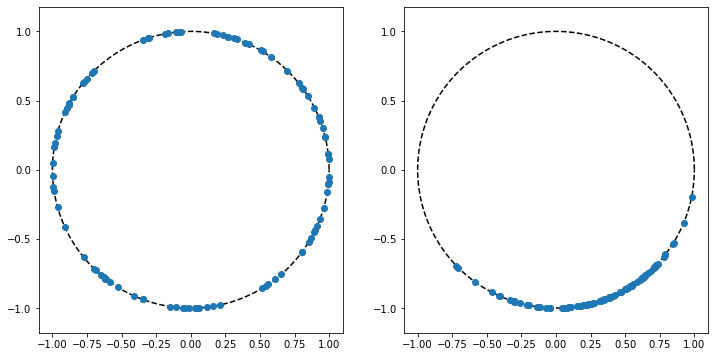

In [39]:
_thetas = jnp.arange(0, 2*jnp.pi, 0.01)
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.axis('equal')
plt.plot(jnp.cos(_thetas), jnp.sin(_thetas), color='black', linestyle='--')
plt.plot(jnp.cos(sol.init_state), jnp.sin(sol.init_state), 'o')
plt.subplot(1,2,2)
plt.axis('equal')
plt.plot(jnp.cos(_thetas), jnp.sin(_thetas), color='black', linestyle='--')
plt.plot(jnp.cos(sol.final_state), jnp.sin(sol.final_state), 'o')